# pyCisTopic scATAC processing

Code based on pyCisTopic tutorial: https://pycistopic.readthedocs.io/en/latest/notebooks/human_cerebellum.html

Please note that you will have to adjust some of the input paths such as blacklist regions, 10x barcodes or RNA input

In [1]:
import pycisTopic
import pandas as pd
import os
pycisTopic.__version__

'2.0a0'

In [ ]:
!ls /bamfiles_filtered

D0.filtered.bam      Q1.filtered.bam.csi  Q3.filtered.bam
D0.filtered.bam.csi  Q2.filtered.bam	  Q3.filtered.bam.csi
Q1.filtered.bam      Q2.filtered.bam.csi


In [ ]:
!ls /fragments/

D0_corrected.tsv.gz	 Q1_corrected.tsv.gz.tbi  Q3_corrected.tsv.gz
D0_corrected.tsv.gz.tbi  Q2_corrected.tsv.gz	  Q3_corrected.tsv.gz.tbi
Q1_corrected.tsv.gz	 Q2_corrected.tsv.gz.tbi


In [ ]:
!pwd

In [ ]:
os.chdir(os.getcwd()) # make sure you are in the current working directory

In [6]:
out_dir = "outs"
os.makedirs(out_dir, exist_ok = True)

# Get cell annotation from RNA

In [7]:
import scanpy as sc

In [ ]:
# her make sure to adjust the path to the RNA h5ad file - it should be the output from RNA scanpy analysis
rna = sc.read_h5ad("multiome_adata_04072025.h5ad")

In [9]:
rna

AnnData object with n_obs × n_vars = 10106 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'celltypist_

In [10]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.25,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine
AAACAGCCAGTTTGTG-D0,D0,8056.0,1891,7.545390,7641.0,8.941415,21.823060,13.584609,7.642979,0.0,...,4,4,4,1,9,37,B-cell lineage,0.978114,Pro-B cells,0.950723
AAACAGCCATGTTTGG-D0,D0,23901.0,2319,7.749322,10986.0,9.304468,21.354451,13.899508,9.111597,0.0,...,8,8,7,13,63,36,B-cell lineage,0.603815,Pro-B cells,0.370262
AAACAGCCATTTAAGC-D0,D0,31317.0,1667,7.419381,6636.0,8.800415,21.503918,13.803495,6.268836,0.0,...,4,4,4,1,26,134,B-cell lineage,0.951335,Pro-B cells,0.903238
AAACATGCATTGGGAG-D0,D0,1039.0,1599,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,...,4,4,4,10,19,81,B-cell lineage,0.121671,Pro-B cells,0.183371
AAACCAACAATAACCT-D0,D0,25718.0,1403,7.247081,5495.0,8.611775,24.913558,18.817106,5.150136,0.0,...,4,4,4,10,8,46,B-cell lineage,0.991872,Pro-B cells,0.996793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-Q3,Q3,13995.0,2061,7.631432,8523.0,9.050641,21.858501,14.009152,6.112871,0.0,...,5,7,18,38,30,9,B-cell lineage,0.930010,Pro-B cells,0.984357
TTTGTGAAGCGAGTAA-Q3,Q3,34490.0,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,...,10,11,8,23,14,5,B-cell lineage,0.403587,Pro-B cells,0.973642
TTTGTGGCAGCCTGCA-Q3,Q3,3673.0,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,...,1,0,0,16,22,58,B-cell lineage,0.484664,Pro-B cells,0.177973
TTTGTTGGTAAACAAG-Q3,Q3,9679.0,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,...,9,10,11,45,50,31,Monocytes,0.745200,Non-classical monocytes,0.041574


In [11]:
rna.obs.celltypist_cell_label_fine.value_counts()

Pro-B cells                  8981
Tem/Trm cytotoxic T cells     249
Tcm/Naive helper T cells      246
CD16+ NK cells                240
Classical monocytes           202
Naive B cells                 120
Non-classical monocytes        68
Name: celltypist_cell_label_fine, dtype: int64

In [12]:
rna.obs[["sample","celltypist_cell_label_fine"]].value_counts()

sample  celltypist_cell_label_fine
Q1      Pro-B cells                   3864
Q3      Pro-B cells                   2004
Q2      Pro-B cells                   1616
D0      Pro-B cells                   1497
Q3      Tem/Trm cytotoxic T cells      242
Q2      Tcm/Naive helper T cells       193
D0      CD16+ NK cells                 160
Q2      Classical monocytes            159
D0      Naive B cells                  102
Q2      CD16+ NK cells                  68
Q3      Non-classical monocytes         41
        Classical monocytes             40
D0      Tcm/Naive helper T cells        39
Q1      Non-classical monocytes         20
Q3      Tcm/Naive helper T cells        12
Q2      Naive B cells                    9
Q3      CD16+ NK cells                   9
Q1      Naive B cells                    7
D0      Non-classical monocytes          6
Q2      Tem/Trm cytotoxic T cells        5
Q1      CD16+ NK cells                   3
D0      Classical monocytes              2
        Tem/Trm cyt

/opt/venv/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


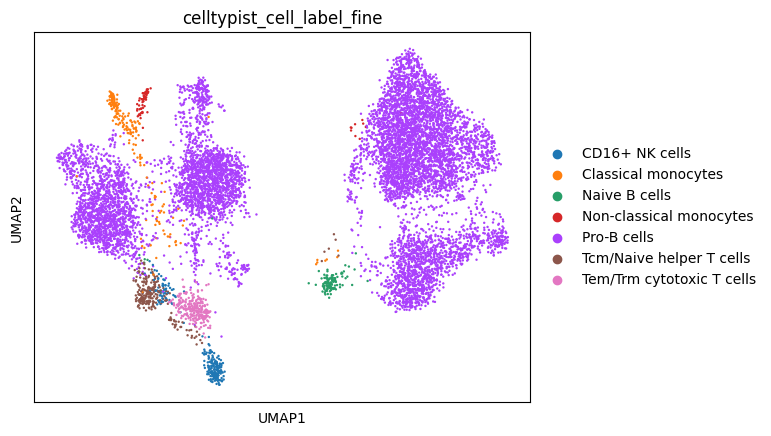

In [13]:
sc.pl.umap(rna, color = "celltypist_cell_label_fine")

In [14]:
rna

AnnData object with n_obs × n_vars = 10106 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'celltypist_

In [15]:
# removing less common cell types to avoid cistopic error
filtered_obs = rna.obs.groupby(["sample","celltypist_cell_label_fine"]).filter(lambda x: len(x) >= 10)
rna = rna[rna.obs.index.isin(filtered_obs.index)]

In [16]:
rna

View of AnnData object with n_obs × n_vars = 10057 × 36601
    obs: 'sample', 'dna_total_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'outlier', 'mt_outlier', 'ribo_outlier', 'doublet_outlier', 'leiden', 'leiden_0.05', 'leiden_0.5', 'leiden_0.6', 'leiden_0.75', 'leiden_0.8', 'leiden_0.85', 'leiden_0.9', 'leiden_0.95', 'leiden_1.0', 'leiden_1.25', 'leiden_1.5', 'leiden_2.0', 'leiden_5.0', 'leiden_10.0', 'leiden_20.0', 'celltypist_cell_label_coarse', 'celltypist_conf_score_coarse', 'celltypist_cell_label_fine', 'celltypist_conf_score_fine'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltypist_cell_label_coarse_colors', 'cel

In [ ]:
# here make sure to adjust the path to the cellranger arc barcodes files
atac_CB = pd.read_csv('/barcodes/cellranger_arc_atac.737K-arc-v1.txt.gz', header = None)
rna_CB = pd.read_csv('/barcodes/cellranger_arc_rna.737K-arc-v1.txt.gz', header = None)

In [18]:
rna_CB.rename(columns={0: 'rna_CB'}, inplace=True)
rna_CB

,rna_CB
0,AAACAGCCAAACAACA
1,AAACAGCCAAACATAG
2,AAACAGCCAAACCCTA
3,AAACAGCCAAACCTAT
4,AAACAGCCAAACCTTG
...,...
736315,TTTGTTGGTTTGGGTA
736316,TTTGTTGGTTTGGTTC
736317,TTTGTTGGTTTGTCTA
736318,TTTGTTGGTTTGTGGA


In [19]:
atac_CB.rename(columns={0: 'atac_CB'}, inplace=True)
atac_CB

,atac_CB
0,ACAGCGGGTGTGTTAC
1,ACAGCGGGTTGTTCTT
2,ACAGCGGGTAACAGGC
3,ACAGCGGGTGCGCGAA
4,ACAGCGGGTCCTCCAT
...,...
736315,CGTACTTCACATAGCA
736316,CGTACTTCACATGCAA
736317,CGTACTTCAGGTTGTA
736318,CGTACTTCAACCCTTG


In [20]:
df_merged =  pd.concat([rna_CB, atac_CB], axis=1)
df_merged.head()

,rna_CB,atac_CB
0,AAACAGCCAAACAACA,ACAGCGGGTGTGTTAC
1,AAACAGCCAAACATAG,ACAGCGGGTTGTTCTT
2,AAACAGCCAAACCCTA,ACAGCGGGTAACAGGC
3,AAACAGCCAAACCTAT,ACAGCGGGTGCGCGAA
4,AAACAGCCAAACCTTG,ACAGCGGGTCCTCCAT


In [21]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.25,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine
AAACAGCCAGTTTGTG-D0,D0,8056.0,1891,7.545390,7641.0,8.941415,21.823060,13.584609,7.642979,0.0,...,4,4,4,1,9,37,B-cell lineage,0.978114,Pro-B cells,0.950723
AAACAGCCATGTTTGG-D0,D0,23901.0,2319,7.749322,10986.0,9.304468,21.354451,13.899508,9.111597,0.0,...,8,8,7,13,63,36,B-cell lineage,0.603815,Pro-B cells,0.370262
AAACAGCCATTTAAGC-D0,D0,31317.0,1667,7.419381,6636.0,8.800415,21.503918,13.803495,6.268836,0.0,...,4,4,4,1,26,134,B-cell lineage,0.951335,Pro-B cells,0.903238
AAACATGCATTGGGAG-D0,D0,1039.0,1599,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,...,4,4,4,10,19,81,B-cell lineage,0.121671,Pro-B cells,0.183371
AAACCAACAATAACCT-D0,D0,25718.0,1403,7.247081,5495.0,8.611775,24.913558,18.817106,5.150136,0.0,...,4,4,4,10,8,46,B-cell lineage,0.991872,Pro-B cells,0.996793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-Q3,Q3,13995.0,2061,7.631432,8523.0,9.050641,21.858501,14.009152,6.112871,0.0,...,5,7,18,38,30,9,B-cell lineage,0.930010,Pro-B cells,0.984357
TTTGTGAAGCGAGTAA-Q3,Q3,34490.0,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,...,10,11,8,23,14,5,B-cell lineage,0.403587,Pro-B cells,0.973642
TTTGTGGCAGCCTGCA-Q3,Q3,3673.0,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,...,1,0,0,16,22,58,B-cell lineage,0.484664,Pro-B cells,0.177973
TTTGTTGGTAAACAAG-Q3,Q3,9679.0,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,...,9,10,11,45,50,31,Monocytes,0.745200,Non-classical monocytes,0.041574


In [22]:
rna.obs['base_index'] = rna.obs.index.str.split('-').str[0]

/tmp/ipykernel_534177/3635066835.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  rna.obs['base_index'] = rna.obs.index.str.split('-').str[0]


In [23]:
rna.obs

,sample,dna_total_counts,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_20_genes,pct_counts_mt,pct_counts_ribo,pct_counts_hb,...,leiden_1.5,leiden_2.0,leiden_5.0,leiden_10.0,leiden_20.0,celltypist_cell_label_coarse,celltypist_conf_score_coarse,celltypist_cell_label_fine,celltypist_conf_score_fine,base_index
AAACAGCCAGTTTGTG-D0,D0,8056.0,1891,7.545390,7641.0,8.941415,21.823060,13.584609,7.642979,0.0,...,4,4,1,9,37,B-cell lineage,0.978114,Pro-B cells,0.950723,AAACAGCCAGTTTGTG
AAACAGCCATGTTTGG-D0,D0,23901.0,2319,7.749322,10986.0,9.304468,21.354451,13.899508,9.111597,0.0,...,8,7,13,63,36,B-cell lineage,0.603815,Pro-B cells,0.370262,AAACAGCCATGTTTGG
AAACAGCCATTTAAGC-D0,D0,31317.0,1667,7.419381,6636.0,8.800415,21.503918,13.803495,6.268836,0.0,...,4,4,1,26,134,B-cell lineage,0.951335,Pro-B cells,0.903238,AAACAGCCATTTAAGC
AAACATGCATTGGGAG-D0,D0,1039.0,1599,7.377759,6888.0,8.837681,24.811266,18.626598,5.894309,0.0,...,4,4,10,19,81,B-cell lineage,0.121671,Pro-B cells,0.183371,AAACATGCATTGGGAG
AAACCAACAATAACCT-D0,D0,25718.0,1403,7.247081,5495.0,8.611775,24.913558,18.817106,5.150136,0.0,...,4,4,10,8,46,B-cell lineage,0.991872,Pro-B cells,0.996793,AAACCAACAATAACCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGAAGCATGAAG-Q3,Q3,13995.0,2061,7.631432,8523.0,9.050641,21.858501,14.009152,6.112871,0.0,...,7,18,38,30,9,B-cell lineage,0.930010,Pro-B cells,0.984357,TTTGTGAAGCATGAAG
TTTGTGAAGCGAGTAA-Q3,Q3,34490.0,1361,7.216709,5059.0,8.529121,23.739870,17.019173,8.381103,0.0,...,11,8,23,14,5,B-cell lineage,0.403587,Pro-B cells,0.973642,TTTGTGAAGCGAGTAA
TTTGTGGCAGCCTGCA-Q3,Q3,3673.0,1536,7.337588,6272.0,8.744010,29.432398,23.852041,6.505102,0.0,...,0,0,16,22,58,B-cell lineage,0.484664,Pro-B cells,0.177973,TTTGTGGCAGCCTGCA
TTTGTTGGTAAACAAG-Q3,Q3,9679.0,1279,7.154615,5301.0,8.575839,35.653650,28.730429,2.886248,0.0,...,10,11,45,50,31,Monocytes,0.745200,Non-classical monocytes,0.041574,TTTGTTGGTAAACAAG


In [24]:
rna.obs['sample'] 

AAACAGCCAGTTTGTG-D0    D0
AAACAGCCATGTTTGG-D0    D0
AAACAGCCATTTAAGC-D0    D0
AAACATGCATTGGGAG-D0    D0
AAACCAACAATAACCT-D0    D0
                       ..
TTTGTGAAGCATGAAG-Q3    Q3
TTTGTGAAGCGAGTAA-Q3    Q3
TTTGTGGCAGCCTGCA-Q3    Q3
TTTGTTGGTAAACAAG-Q3    Q3
TTTGTTGGTTAAGCTG-Q3    Q3
Name: sample, Length: 10057, dtype: category
Categories (4, object): ['D0', 'Q1', 'Q2', 'Q3']

In [25]:
rna.obs['sample'].value_counts()

Q1    3884
Q3    2339
Q2    2036
D0    1798
Name: sample, dtype: int64

In [26]:
# mapping atac barcodes based on rna
mapping_dict = pd.Series(df_merged['atac_CB'].values, index=df_merged['rna_CB']).to_dict()
rna.obs['atac_CB'] = rna.obs['base_index'].map(mapping_dict)

In [27]:
rna.obs['atac_CB'] = rna.obs['atac_CB'].astype(str) + '-'+ rna.obs['sample'].astype(str)
rna.obs['atac_CB']

AAACAGCCAGTTTGTG-D0    ACAGCGGGTGTTACTA-D0
AAACAGCCATGTTTGG-D0    ACAGCGGGTTTATCCT-D0
AAACAGCCATTTAAGC-D0    ACAGCGGGTTCACTTT-D0
AAACATGCATTGGGAG-D0    CATTTAGGTGTCCACA-D0
AAACCAACAATAACCT-D0    CTTTATCGTCGAGGCA-D0
                              ...         
TTTGTGAAGCATGAAG-Q3    GTAGGTGTCAGTGAAC-Q3
TTTGTGAAGCGAGTAA-Q3    GTAGGTGTCGGTCCAT-Q3
TTTGTGGCAGCCTGCA-Q3    GTTTGGTGTTTCTAAG-Q3
TTTGTTGGTAAACAAG-Q3    CGTACTTCAAATATGC-Q3
TTTGTTGGTTAAGCTG-Q3    CGTACTTCATGATGAT-Q3
Name: atac_CB, Length: 10057, dtype: object

In [28]:
rna_cell_type = rna.obs[['atac_CB','celltypist_cell_label_fine']] # subset to keep info on atac cb and cell type only

In [29]:
rna_cell_type

,atac_CB,celltypist_cell_label_fine
AAACAGCCAGTTTGTG-D0,ACAGCGGGTGTTACTA-D0,Pro-B cells
AAACAGCCATGTTTGG-D0,ACAGCGGGTTTATCCT-D0,Pro-B cells
AAACAGCCATTTAAGC-D0,ACAGCGGGTTCACTTT-D0,Pro-B cells
AAACATGCATTGGGAG-D0,CATTTAGGTGTCCACA-D0,Pro-B cells
AAACCAACAATAACCT-D0,CTTTATCGTCGAGGCA-D0,Pro-B cells
...,...,...
TTTGTGAAGCATGAAG-Q3,GTAGGTGTCAGTGAAC-Q3,Pro-B cells
TTTGTGAAGCGAGTAA-Q3,GTAGGTGTCGGTCCAT-Q3,Pro-B cells
TTTGTGGCAGCCTGCA-Q3,GTTTGGTGTTTCTAAG-Q3,Pro-B cells
TTTGTTGGTAAACAAG-Q3,CGTACTTCAAATATGC-Q3,Non-classical monocytes


In [30]:
# replace + signs with pos and white spaces with underscore
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('/','_')
rna_cell_type['celltypist_cell_label_fine'].value_counts()

/tmp/ipykernel_534177/2305620188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace(' ','_')
/tmp/ipykernel_534177/2305620188.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rna_cell_type['celltypist_cell_label_fine'] = rna_cell_type['celltypist_cell_label_fine'].str.replace('+','pos')
/tmp/ipykernel_534177/2305620188.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

Pro-B_cells                  8981
Tcm_Naive_helper_T_cells      244
Tem_Trm_cytotoxic_T_cells     242
CD16pos_NK_cells              228
Classical_monocytes           199
Naive_B_cells                 102
Non-classical_monocytes        61
Name: celltypist_cell_label_fine, dtype: int64

In [31]:
rna_cell_type = rna_cell_type.set_index('atac_CB')
rna_cell_type = rna_cell_type.rename(columns={'celltypist_cell_label_fine': 'cell_type'})

In [32]:
rna_cell_type

,cell_type
atac_CB,
ACAGCGGGTGTTACTA-D0,Pro-B_cells
ACAGCGGGTTTATCCT-D0,Pro-B_cells
ACAGCGGGTTCACTTT-D0,Pro-B_cells
CATTTAGGTGTCCACA-D0,Pro-B_cells
CTTTATCGTCGAGGCA-D0,Pro-B_cells
...,...
GTAGGTGTCAGTGAAC-Q3,Pro-B_cells
GTAGGTGTCGGTCCAT-Q3,Pro-B_cells
GTTTGGTGTTTCTAAG-Q3,Pro-B_cells


In [33]:
rna_cell_type["sample_id"] = rna_cell_type.index.str.split('-').str[1]

In [34]:
rna_cell_type.loc[rna_cell_type['cell_type'] == 'Pro-B_cells', 'cell_type'] = rna_cell_type['cell_type'] + '_'+ rna_cell_type['sample_id'].astype(str)

In [35]:
rna_cell_type['cell_type'].value_counts()

Pro-B_cells_Q1               3864
Pro-B_cells_Q3               2004
Pro-B_cells_Q2               1616
Pro-B_cells_D0               1497
Tcm_Naive_helper_T_cells      244
Tem_Trm_cytotoxic_T_cells     242
CD16pos_NK_cells              228
Classical_monocytes           199
Naive_B_cells                 102
Non-classical_monocytes        61
Name: cell_type, dtype: int64

# Get pseudobulks

In [36]:
fragments_dict = {
    "D0":"fragments/D0_corrected.tsv.gz",
    "Q1": "fragments/Q1_corrected.tsv.gz",
    "Q2":"fragments/Q2_corrected.tsv.gz",
    "Q3":"fragments/Q3_corrected.tsv.gz"
}

In [37]:
chromsizes = pd.read_table(
    "http://hgdownload.cse.ucsc.edu/goldenPath/hg38/bigZips/hg38.chrom.sizes",
    header = None,
    names = ["Chromosome", "End"]
)
chromsizes.insert(1, "Start", 0)
chromsizes.head()

,Chromosome,Start,End
0,chr1,0,248956422
1,chr2,0,242193529
2,chr3,0,198295559
3,chr4,0,190214555
4,chr5,0,181538259


In [38]:
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
os.makedirs(os.path.join(out_dir, "consensus_peak_calling"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"), exist_ok = True)
os.makedirs(os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"), exist_ok = True)


bw_paths, bed_paths = export_pseudobulk(
    input_data = rna_cell_type,
    variable = "cell_type",
    sample_id_col = "sample_id",
    chromsizes = chromsizes,
    bed_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bed_files"),
    bigwig_path = os.path.join(out_dir, "consensus_peak_calling/pseudobulk_bw_files"),
    path_to_fragments = fragments_dict,
    n_cpu = 20,
    normalize_bigwig = True,
    temp_dir = "/staging/leuven/stg_00096/home/projects/2023_Cools_B-ALL/atac/tmp",
    split_pattern = "-"
)

/opt/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-07-09 20:50:03,165	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


2025-07-09 20:50:03,657 cisTopic     INFO     Splitting fragments by cell type.
2025-07-09 20:51:11,603 cisTopic     INFO     generating bigwig files


In [39]:
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv"), "wt") as f:
    for v in bw_paths:
        _ = f.write(f"{v}\t{bw_paths[v]}\n")

In [40]:
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv"), "wt") as f:
    for v in bed_paths:
        _ = f.write(f"{v}\t{bed_paths[v]}\n")

# Inferring the consensus peaks

In [41]:
bw_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bw_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bw_paths.update({v: p})
        
# bw_paths = {key.replace(' ', '_'): value for key, value in bw_paths.items()} # remove white spaces in cell type names to avoid issues with MACS

In [42]:
bed_paths = {}
with open(os.path.join(out_dir, "consensus_peak_calling/bed_paths.tsv")) as f:
    for line in f:
        v, p = line.strip().split("\t")
        bed_paths.update({v: p})

# bed_paths = {key.replace(' ', '_'): value for key, value in bed_paths.items()} # remove white spaces in cell type names to avoid issues with MACS

In [43]:
bed_paths

{'Pro-B_cells_D0': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_D0.fragments.tsv.gz',
 'Naive_B_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Naive_B_cells.fragments.tsv.gz',
 'CD16pos_NK_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/CD16pos_NK_cells.fragments.tsv.gz',
 'Tcm_Naive_helper_T_cells': 'outs/consensus_peak_calling/pseudobulk_bed_files/Tcm_Naive_helper_T_cells.fragments.tsv.gz',
 'Pro-B_cells_Q1': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q1.fragments.tsv.gz',
 'Non-classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Non-classical_monocytes.fragments.tsv.gz',
 'Pro-B_cells_Q2': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q2.fragments.tsv.gz',
 'Classical_monocytes': 'outs/consensus_peak_calling/pseudobulk_bed_files/Classical_monocytes.fragments.tsv.gz',
 'Pro-B_cells_Q3': 'outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_Q3.fragments.tsv.gz',
 'Tem_Trm_cytotoxic_T_c

In [ ]:
from pycisTopic.pseudobulk_peak_calling import peak_calling
macs_path = "macs2"

os.makedirs(os.path.join(out_dir, "consensus_peak_calling/MACS"), exist_ok = True)

narrow_peak_dict = peak_calling(
    macs_path = macs_path,
    bed_paths = bed_paths,
    outdir = os.path.join(os.path.join(out_dir, "consensus_peak_calling/MACS")),
    genome_size = 'hs',
    n_cpu = 20,
    input_format = 'BEDPE',
    shift = 73,
    ext_size = 146,
    keep_dup = 'all',
    q_value = 0.05,
    _temp_dir = '/ray_spill' # you can adjust this directory as you need
)

2025-07-09 20:52:22,587	INFO worker.py:1724 -- Started a local Ray instance.


(macs_call_peak_ray pid=558219) 2025-07-09 20:52:27,600 cisTopic     INFO     Calling peaks for Pro-B_cells_D0 with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Pro-B_cells_D0.fragments.tsv.gz --name Pro-B_cells_D0  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=558200) 2025-07-09 20:52:27,735 cisTopic     INFO     Calling peaks for Non-classical_monocytes with macs2 callpeak --treatment outs/consensus_peak_calling/pseudobulk_bed_files/Non-classical_monocytes.fragments.tsv.gz --name Non-classical_monocytes  --outdir outs/consensus_peak_calling/MACS --format BEDPE --gsize hs --qvalue 0.05 --nomodel --shift 73 --extsize 146 --keep-dup all --call-summits --nolambda
(macs_call_peak_ray pid=558214) 2025-07-09 20:52:27,722 cisTopic     INFO     Calling peaks for Classical_monocytes with macs2 callpeak --treatment outs/consensus_

In [ ]:
from pycisTopic.iterative_peak_calling import get_consensus_peaks
# Other param
peak_half_width=250
path_to_blacklist="/regions/hg38-blacklist.v2.bed" # here adjust the path to where your blacklist is located
# Get consensus peaks
consensus_peaks = get_consensus_peaks(
    narrow_peaks_dict = narrow_peak_dict,
    peak_half_width = peak_half_width,
    chromsizes = chromsizes,
    path_to_blacklist = path_to_blacklist)

2025-07-09 20:54:39,501 cisTopic     INFO     Extending and merging peaks per class


/opt/venv/lib/python3.11/site-packages/pyranges/methods/intersection.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  scdf.loc[:, "Start"] = new_starts
/opt/venv/lib/python3.11/site-packages/pyranges/methods/intersection.py:53: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  scdf.loc[:, "End"] = new_ends
/opt/venv/lib/python3.11/site-packages/pyranges/methods/intersection.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use 

2025-07-09 20:55:14,344 cisTopic     INFO     Normalizing peak scores
2025-07-09 20:55:14,604 cisTopic     INFO     Merging peaks
Warning! Start and End columns now have different dtypes: int64 and int32
2025-07-09 20:55:56,478 cisTopic     INFO     Done!


In [46]:
consensus_peaks.to_bed(
    path = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed"),
    keep =True,
    compression = 'infer',
    chain = False)

/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return pd.concat([outdf, df.get(noncanonical)], axis=1)
/opt/venv/lib/python3.11/site-packages/pyranges/out.py:37: FutureWarning: Passin

# QC

In [47]:
!pycistopic tss gene_annotation_list --server http://may2024.archive.ensembl.org/ | grep Human

hsapiens_gene_ensembl	Human genes (GRCh38.p14)


In [48]:
!mkdir -p outs/qc
!pycistopic tss get_tss \
    --output outs/qc/tss.bed \
    --name "hsapiens_gene_ensembl" \
    --to-chrom-source ucsc \
    --server http://may2024.archive.ensembl.org/ \
    --ucsc hg38

- Get TSS annotation from Ensembl BioMart with the following settings:
  - biomart_name: "hsapiens_gene_ensembl"
  - biomart_host: "http://may2024.archive.ensembl.org/"
  - transcript_type: ['protein_coding']
  - use_cache: True
- Getting chromosome sizes and alias mapping for "hg38" from UCSC.
- Update chromosome names in TSS annotation to "ucsc" chromosome names.
- Writing TSS annotation BED file to "outs/qc/tss.bed".


In [49]:
!head outs/qc/tss.bed | column -t

/bin/bash: line 1: column: command not found
head: write error: Broken pipe


In [50]:
regions_bed_filename = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
tss_bed_filename = os.path.join(out_dir, "qc", "tss.bed")

pycistopic_qc_commands_filename = "pycistopic_qc_commands.sh"

# Create text file with all pycistopic qc command lines.
with open(pycistopic_qc_commands_filename, "w") as fh:
    for sample, fragment_filename in fragments_dict.items():
        print(
            "pycistopic qc",
            f"--fragments {fragment_filename}",
            f"--regions {regions_bed_filename}",
            f"--tss {tss_bed_filename}",
            f'--output {os.path.join(out_dir, "qc")}/{sample}',
            sep=" ",
            file=fh,
        )

In [51]:
!cat pycistopic_qc_commands.sh

pycistopic qc --fragments fragments/D0_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/D0
pycistopic qc --fragments fragments/Q1_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/Q1
pycistopic qc --fragments fragments/Q2_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/Q2
pycistopic qc --fragments fragments/Q3_corrected.tsv.gz --regions outs/consensus_peak_calling/consensus_regions.bed --tss outs/qc/tss.bed --output outs/qc/Q3


**In command line**

Make sure ot have your pycistopic conda environment activated when running the pycistopic command
```
chmod u+x pycistopic_qc_commands.sh
pycistopic_qc_commands.sh
```

In [53]:
from pycisTopic.plotting.qc_plot import plot_sample_stats, plot_barcode_stats
import matplotlib.pyplot as plt

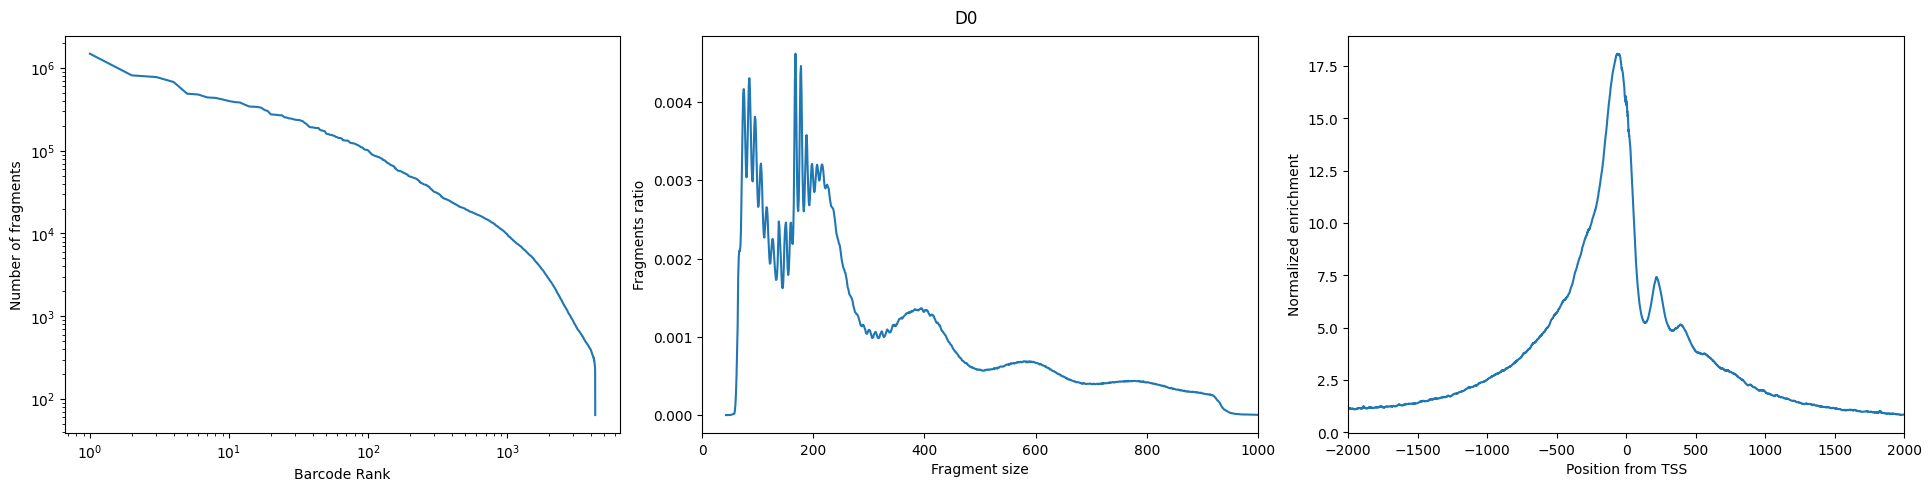

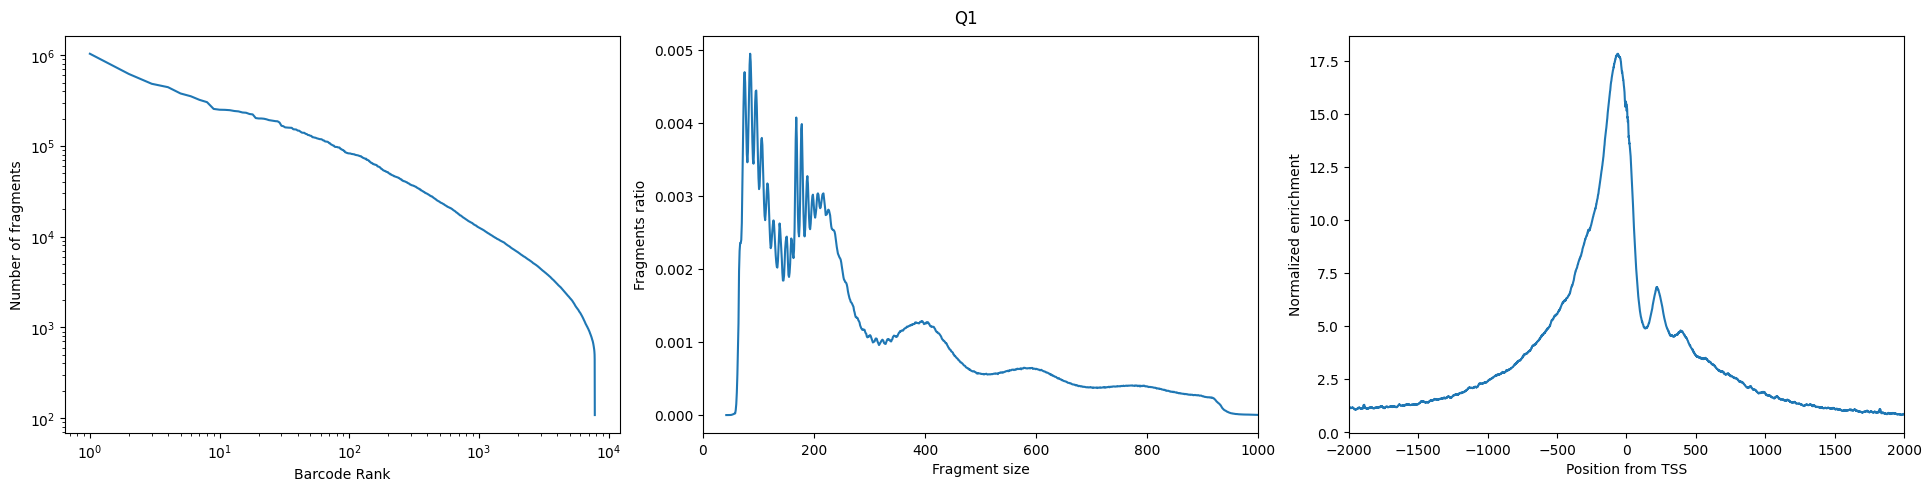

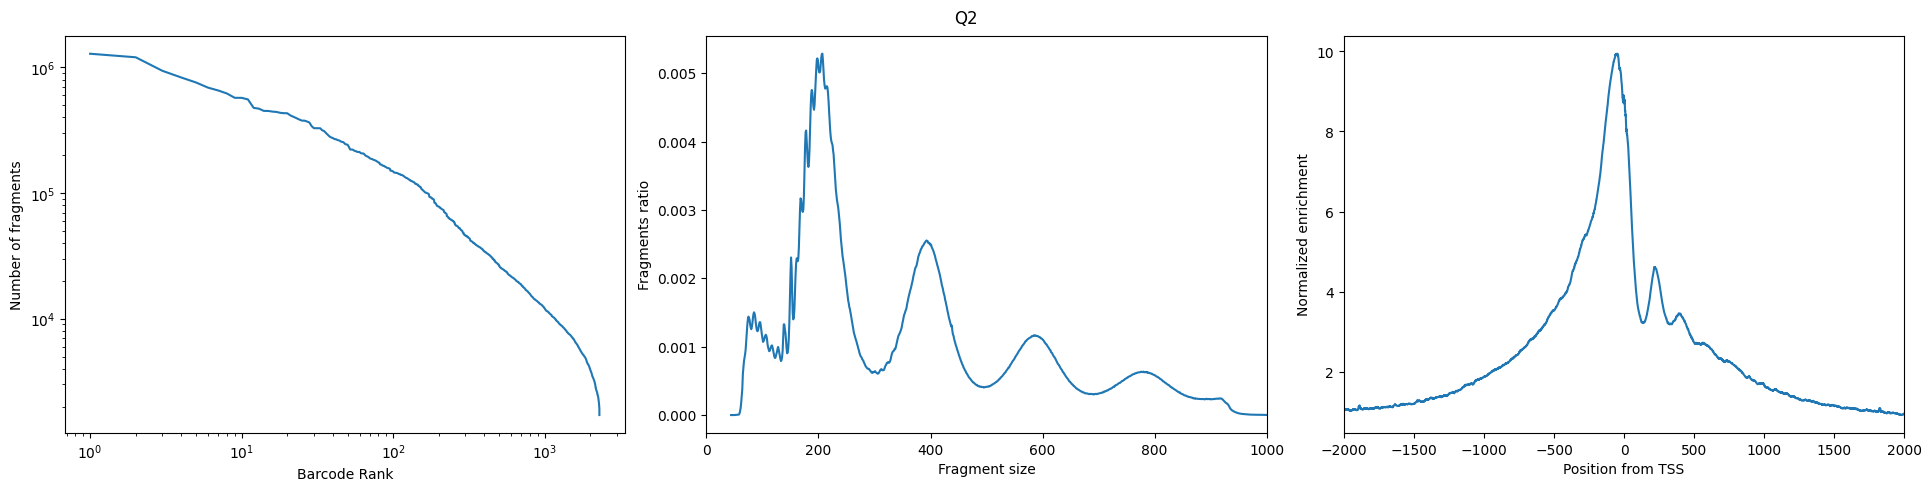

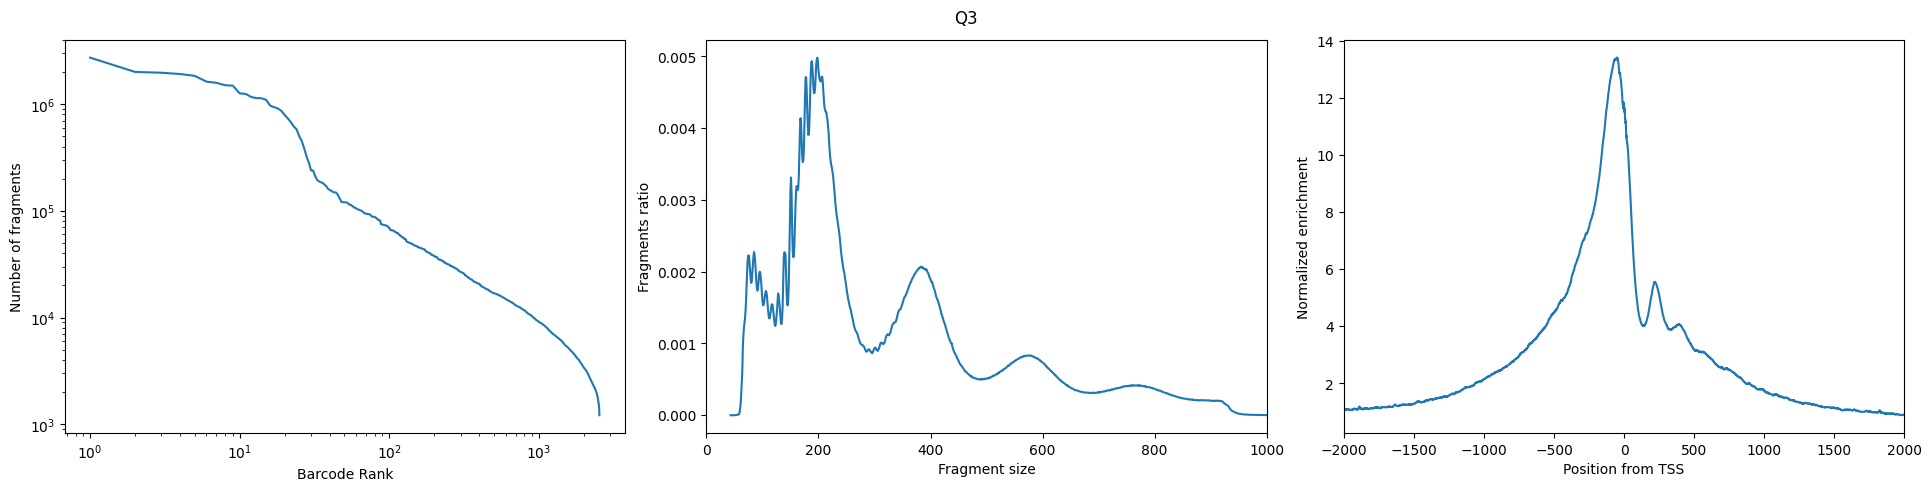

In [54]:
for sample_id in fragments_dict:
    fig = plot_sample_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc"
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig) 

In [55]:
from pycisTopic.qc import get_barcodes_passing_qc_for_sample
sample_id_to_barcodes_passing_filters = {}
sample_id_to_thresholds = {}
for sample_id in fragments_dict:
    (
        sample_id_to_barcodes_passing_filters[sample_id],
        sample_id_to_thresholds[sample_id]
    ) = get_barcodes_passing_qc_for_sample(
            sample_id = sample_id,
            pycistopic_qc_output_dir = "outs/qc",
            unique_fragments_threshold = 1000, # use automatic thresholding when you specify None
            tss_enrichment_threshold = 10, # use automatic thresholding
            frip_threshold = 0,
            use_automatic_thresholds = True,
    )

D0:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q1:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q2:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10
Q3:
	Using user-defined threshold for unique fragments: 1000
	Using user-defined threshold for TSS enrichment: 10


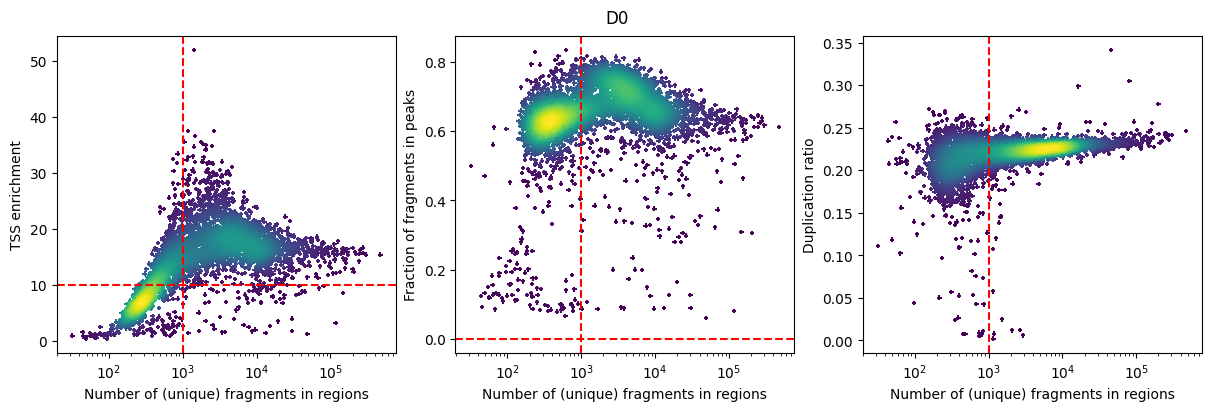

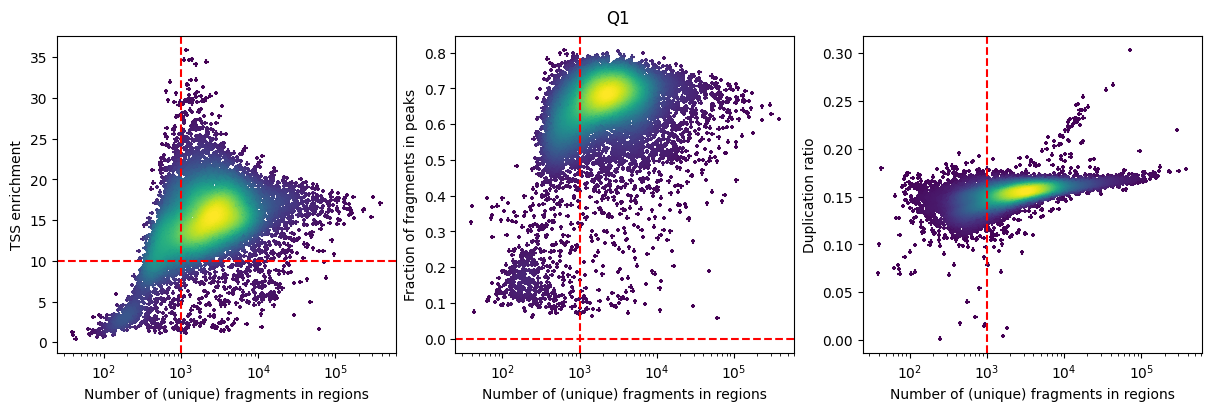

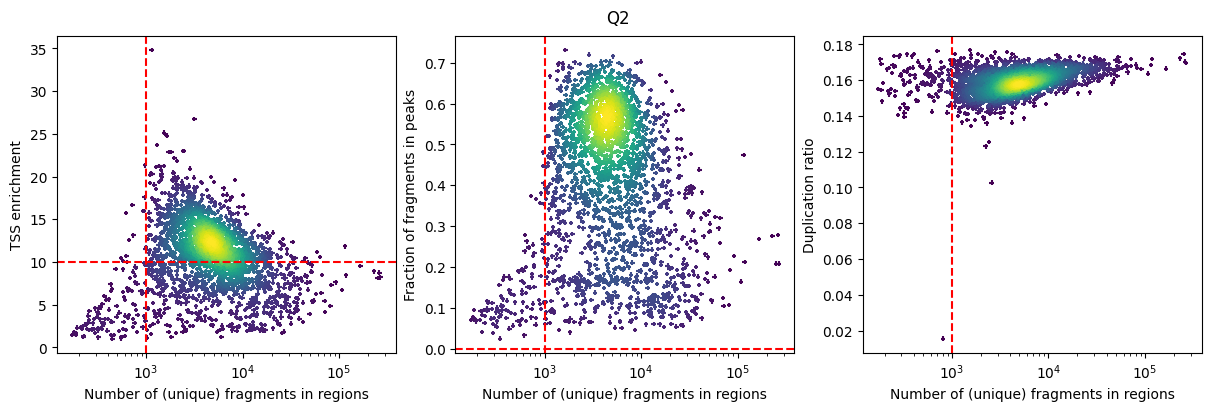

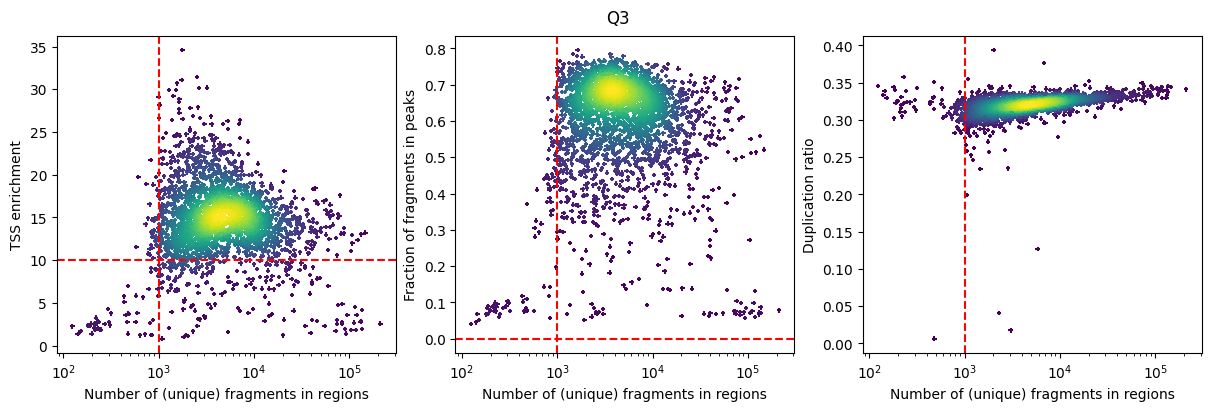

In [56]:
for sample_id in fragments_dict:
    fig = plot_barcode_stats(
        sample_id = sample_id,
        pycistopic_qc_output_dir = "outs/qc",
        bc_passing_filters = sample_id_to_barcodes_passing_filters[sample_id],
        detailed_title = False,
        **sample_id_to_thresholds[sample_id] 
    )
    fig.savefig(f"outs/qc/{sample_id}_ATAC_QC_cell_stats.pdf",dpi=300)
    plt.show() 
    plt.close(fig)

# Creating a cisTopic object

In [ ]:
path_to_regions = os.path.join(out_dir, "consensus_peak_calling/consensus_regions.bed")
path_to_blacklist="/regions/hg38-blacklist.v2.bed" # adjust the path
pycistopic_qc_output_dir = "outs/qc"

from pycisTopic.cistopic_class import create_cistopic_object_from_fragments
import polars as pl

cistopic_obj_list = []
for sample_id in fragments_dict:
    sample_metrics = pl.read_parquet(
        os.path.join(pycistopic_qc_output_dir, f'{sample_id}.fragments_stats_per_cb.parquet')
    ).to_pandas().set_index("CB").loc[ sample_id_to_barcodes_passing_filters[sample_id] ]
    cistopic_obj = create_cistopic_object_from_fragments(
        path_to_fragments = fragments_dict[sample_id],
        path_to_regions = path_to_regions,
        path_to_blacklist = path_to_blacklist,
        metrics = sample_metrics,
        valid_bc = sample_id_to_barcodes_passing_filters[sample_id],
        n_cpu = 5,
        project = sample_id,
        split_pattern = '-'
    )
    cistopic_obj_list.append(cistopic_obj)

2025-07-09 21:00:23,770 cisTopic     INFO     Reading data for D0
2025-07-09 21:00:54,731 cisTopic     INFO     metrics provided!
2025-07-09 21:00:58,033 cisTopic     INFO     Counting fragments in regions


2025-07-09 21:01:01,763	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-09 21:01:16,180 cisTopic     INFO     Creating fragment matrix
2025-07-09 21:01:28,403 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-07-09 21:01:31,320 cisTopic     INFO     Removing blacklisted regions
2025-07-09 21:01:32,074 cisTopic     INFO     Creating CistopicObject
2025-07-09 21:01:32,685 cisTopic     INFO     Done!
2025-07-09 21:01:32,756 cisTopic     INFO     Reading data for Q1
2025-07-09 21:02:11,651 cisTopic     INFO     metrics provided!
2025-07-09 21:02:14,843 cisTopic     INFO     Counting fragments in regions


2025-07-09 21:02:18,670	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-09 21:02:35,447 cisTopic     INFO     Creating fragment matrix
2025-07-09 21:02:55,657 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-07-09 21:03:01,453 cisTopic     INFO     Removing blacklisted regions
2025-07-09 21:03:02,179 cisTopic     INFO     Creating CistopicObject
2025-07-09 21:03:03,011 cisTopic     INFO     Done!
2025-07-09 21:03:03,112 cisTopic     INFO     Reading data for Q2
2025-07-09 21:03:43,966 cisTopic     INFO     metrics provided!
2025-07-09 21:03:47,284 cisTopic     INFO     Counting fragments in regions


2025-07-09 21:03:51,116	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-09 21:03:57,262 cisTopic     INFO     Creating fragment matrix
2025-07-09 21:04:01,864 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-07-09 21:04:03,344 cisTopic     INFO     Removing blacklisted regions
2025-07-09 21:04:04,021 cisTopic     INFO     Creating CistopicObject
2025-07-09 21:04:04,301 cisTopic     INFO     Done!
2025-07-09 21:04:04,341 cisTopic     INFO     Reading data for Q3
2025-07-09 21:04:41,311 cisTopic     INFO     metrics provided!
2025-07-09 21:04:44,011 cisTopic     INFO     Counting fragments in regions


2025-07-09 21:04:47,847	INFO worker.py:1724 -- Started a local Ray instance.


2025-07-09 21:04:57,408 cisTopic     INFO     Creating fragment matrix
2025-07-09 21:05:06,562 cisTopic     INFO     Converting fragment matrix to sparse matrix
2025-07-09 21:05:09,077 cisTopic     INFO     Removing blacklisted regions
2025-07-09 21:05:09,761 cisTopic     INFO     Creating CistopicObject
2025-07-09 21:05:10,195 cisTopic     INFO     Done!


In [58]:
cistopic_obj = cistopic_obj_list[0]
print(cistopic_obj)

CistopicObject from project D0 with n_cells × n_regions = 2380 × 190004


In [59]:
from pycisTopic.cistopic_class import merge
cistopic_obj = merge(cistopic_obj_list)

2025-07-09 21:05:12,581 cisTopic     INFO     cisTopic object 1 merged
2025-07-09 21:05:15,212 cisTopic     INFO     cisTopic object 2 merged
2025-07-09 21:05:18,214 cisTopic     INFO     cisTopic object 3 merged


In [60]:
cistopic_obj

In [61]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,unique_fragments_in_peaks_count,log10_unique_fragments_in_peaks_count,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode
CTCACCACACTAATCC-D0___D0,117945,5.07168,56687,4.753483,D0,48,228811,5.359479,173269,5.238723,...,109164,5.038083,0.630026,55542,0.242742,15.833652,0.006127,0.353406,1.063975,CTCACCACACTAATCC
GTCTAGCTCCAGGATG-D0___D0,4309,3.634376,3833,3.583539,D0,1403,7554,3.878234,5805,3.763877,...,4046,3.607133,0.696985,1749,0.231533,20.061720,0.040765,2.790768,13.634188,GTCTAGCTCCAGGATG
CTAATGTTCTTTGGGC-D0___D0,44785,4.651133,28796,4.459332,D0,144,87837,4.943682,68021,4.832649,...,41373,4.616728,0.608239,19816,0.225600,14.099705,0.007766,0.472196,3.318146,CTAATGTTCTTTGGGC
CTAGGATAGTGGCTTC-D0___D0,169715,5.22972,70760,4.849788,D0,21,363011,5.559921,273397,5.436795,...,156697,5.195063,0.573148,89614,0.246863,12.959083,0.001893,0.081585,0.496313,CTAGGATAGTGGCTTC
TCCTCAAAGGCCTAAG-D0___D0,76616,4.884319,41713,4.620271,D0,88,144902,5.161077,111302,5.046507,...,71034,4.851472,0.638210,33600,0.231881,16.636220,0.008826,0.482629,2.780202,TCCTCAAAGGCCTAAG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGAAGTAAGGTGGGAG-Q3___Q3,1728,3.237544,1539,3.187239,Q3,2361,3268,3.514415,2197,3.342028,...,1576,3.197832,0.717342,1071,0.327723,13.521482,0.058333,1.975873,10.617857,GGAAGTAAGGTGGGAG
GCATTACGTAAGTGGC-Q3___Q3,1123,3.05038,980,2.991226,Q3,2370,3080,3.488692,2175,3.337659,...,1040,3.017451,0.478161,905,0.293831,13.003755,0.032355,0.668381,4.243089,GCATTACGTAAGTGGC
GAGGGTGAGGTATGGT-Q3___Q3,1309,3.11694,1203,3.080266,Q3,2478,2643,3.422261,1766,3.247237,...,1201,3.079904,0.680068,877,0.331820,15.620820,0.032358,1.620738,3.498081,GAGGGTGAGGTATGGT
TGGACCAAGGTTGTAA-Q3___Q3,1755,3.244277,1583,3.199481,Q3,2350,3268,3.514415,2222,3.346939,...,1619,3.209515,0.728623,1046,0.320073,18.044076,0.033082,1.786099,19.379643,TGGACCAAGGTTGTAA


## Doublet filtering

In [62]:
# atac
dbl = cistopic_obj.cell_data.total_fragments_count > 60000
cistopic_obj.cell_data['doublets_atac'] = dbl
cistopic_obj.cell_data['doublets_atac'].value_counts()

False    10751
True       519
Name: doublets_atac, dtype: int64

In [ ]:
# rna
rna_dbl = pd.read_csv('/barcode_doublet.tsv', sep = '\t') # adjust path to the RNA multiome doublet file
rna_dbl['base_index'] = rna_dbl['Unnamed: 0'].str.split('-').str[0]
rna_dbl['sample'] = rna_dbl['Unnamed: 0'].str.split('-').str[1]
rna_dbl['atac_CB'] = rna_dbl['base_index'].map(mapping_dict)
rna_dbl['pycistopic_CB'] = rna_dbl['atac_CB'] +'-' + rna_dbl['sample'] + '___'+ rna_dbl['sample']
rna_dbl = rna_dbl[['doublet_outlier','pycistopic_CB']]
rna_dbl = rna_dbl.set_index('pycistopic_CB')
rna_dbl

,doublet_outlier
pycistopic_CB,
ACAGCGGGTGTTACTA-D0___D0,False
ACAGCGGGTTTATCCT-D0___D0,False
ACAGCGGGTTCACTTT-D0___D0,False
CATTTAGGTGTCCACA-D0___D0,False
CTTTATCGTCGAGGCA-D0___D0,False
...,...
GTAGGTGTCGGTCCAT-Q3___Q3,False
GTAGGTGTCCCAATAT-Q3___Q3,True
GTTTGGTGTTTCTAAG-Q3___Q3,False


In [64]:
cistopic_obj.cell_data = cistopic_obj.cell_data.join(rna_dbl, how='left')
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
CTCACCACACTAATCC-D0___D0,117945,5.07168,56687,4.753483,D0,48,228811,5.359479,173269,5.238723,...,0.630026,55542,0.242742,15.833652,0.006127,0.353406,1.063975,CTCACCACACTAATCC,True,True
GTCTAGCTCCAGGATG-D0___D0,4309,3.634376,3833,3.583539,D0,1403,7554,3.878234,5805,3.763877,...,0.696985,1749,0.231533,20.061720,0.040765,2.790768,13.634188,GTCTAGCTCCAGGATG,False,False
CTAATGTTCTTTGGGC-D0___D0,44785,4.651133,28796,4.459332,D0,144,87837,4.943682,68021,4.832649,...,0.608239,19816,0.225600,14.099705,0.007766,0.472196,3.318146,CTAATGTTCTTTGGGC,True,True
CTAGGATAGTGGCTTC-D0___D0,169715,5.22972,70760,4.849788,D0,21,363011,5.559921,273397,5.436795,...,0.573148,89614,0.246863,12.959083,0.001893,0.081585,0.496313,CTAGGATAGTGGCTTC,True,True
TCCTCAAAGGCCTAAG-D0___D0,76616,4.884319,41713,4.620271,D0,88,144902,5.161077,111302,5.046507,...,0.638210,33600,0.231881,16.636220,0.008826,0.482629,2.780202,TCCTCAAAGGCCTAAG,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGAAGTAAGGTGGGAG-Q3___Q3,1728,3.237544,1539,3.187239,Q3,2361,3268,3.514415,2197,3.342028,...,0.717342,1071,0.327723,13.521482,0.058333,1.975873,10.617857,GGAAGTAAGGTGGGAG,False,False
GCATTACGTAAGTGGC-Q3___Q3,1123,3.05038,980,2.991226,Q3,2370,3080,3.488692,2175,3.337659,...,0.478161,905,0.293831,13.003755,0.032355,0.668381,4.243089,GCATTACGTAAGTGGC,False,False
GAGGGTGAGGTATGGT-Q3___Q3,1309,3.11694,1203,3.080266,Q3,2478,2643,3.422261,1766,3.247237,...,0.680068,877,0.331820,15.620820,0.032358,1.620738,3.498081,GAGGGTGAGGTATGGT,False,False
TGGACCAAGGTTGTAA-Q3___Q3,1755,3.244277,1583,3.199481,Q3,2350,3268,3.514415,2222,3.346939,...,0.728623,1046,0.320073,18.044076,0.033082,1.786099,19.379643,TGGACCAAGGTTGTAA,False,False


In [65]:
cistopic_obj.cell_data[cistopic_obj.cell_data['doublet_outlier'] == True]

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
CTCACCACACTAATCC-D0___D0,117945,5.07168,56687,4.753483,D0,48,228811,5.359479,173269,5.238723,...,0.630026,55542,0.242742,15.833652,0.006127,0.353406,1.063975,CTCACCACACTAATCC,True,True
CTAATGTTCTTTGGGC-D0___D0,44785,4.651133,28796,4.459332,D0,144,87837,4.943682,68021,4.832649,...,0.608239,19816,0.225600,14.099705,0.007766,0.472196,3.318146,CTAATGTTCTTTGGGC,True,True
CTAGGATAGTGGCTTC-D0___D0,169715,5.22972,70760,4.849788,D0,21,363011,5.559921,273397,5.436795,...,0.573148,89614,0.246863,12.959083,0.001893,0.081585,0.496313,CTAGGATAGTGGCTTC,True,True
TCCTCAAAGGCCTAAG-D0___D0,76616,4.884319,41713,4.620271,D0,88,144902,5.161077,111302,5.046507,...,0.638210,33600,0.231881,16.636220,0.008826,0.482629,2.780202,TCCTCAAAGGCCTAAG,True,True
TTGTTGTAGATTCCTG-D0___D0,188431,5.275152,73860,4.868409,D0,19,389786,5.590827,301151,5.478786,...,0.579347,88635,0.227394,15.310487,0.003752,0.087654,0.475659,TTGTTGTAGATTCCTG,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATGGCTACACCAGCTC-Q3___Q3,2165,3.335458,1838,3.264346,Q3,1691,6925,3.840482,4669,3.669317,...,0.424716,2256,0.325776,10.281991,0.041715,0.523076,17.086057,ATGGCTACACCAGCTC,False,True
ATCCCTCGTCATTTCT-Q3___Q3,1554,3.191451,1453,3.162266,Q3,1767,6441,3.809021,4327,3.636287,...,0.329327,2114,0.328210,12.119897,0.052484,0.256016,8.684225,ATCCCTCGTCATTTCT,False,True
ACGCACGCATGCAACA-Q3___Q3,2535,3.403978,2319,3.365301,Q3,1995,4822,3.683317,3410,3.532882,...,0.683871,1412,0.292825,16.328809,0.069392,3.793123,2.753971,ACGCACGCATGCAACA,False,True
CGCCTTTGTCAATTGC-Q3___Q3,7893,3.897242,6255,3.796227,Q3,875,15586,4.192763,10590,4.024937,...,0.684230,4996,0.320544,15.441347,0.110319,3.665789,38.856796,CGCCTTTGTCAATTGC,False,True


In [66]:
cistopic_obj.cell_data['doublet_outlier'].isna().value_counts()
# there is quite some NaNs

False    8751
True     2519
Name: doublet_outlier, dtype: int64

In [67]:
# fill nans as False so NaNs are kept in
cistopic_obj.cell_data['doublet_outlier'] = cistopic_obj.cell_data['doublet_outlier'].fillna(False)

In [68]:
cells_to_keep = cistopic_obj.cell_data[(cistopic_obj.cell_data['doublet_outlier'] == False) & (cistopic_obj.cell_data['doublets_atac'] == False)].index.tolist()
len(cells_to_keep)

10268

In [69]:
print(cistopic_obj)

CistopicObject from project cisTopic_merge with n_cells × n_regions = 11270 × 190764


In [71]:
# doublet barcodes - save for futue
cistopic_obj.cell_data[
    (cistopic_obj.cell_data.total_fragments_count > 60000)
].index.to_series().to_csv('outs/barcode_doublets_atac.csv', index = False)

In [72]:
cistopic_obj.subset(cells=cells_to_keep)

In [73]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
GTCTAGCTCCAGGATG-D0___D0,4309,3.634376,3833,3.583539,D0,1403,7554,3.878234,5805,3.763877,...,0.696985,1749,0.231533,20.061720,0.040765,2.790768,13.634188,GTCTAGCTCCAGGATG,False,False
CACGGTTTCGTTAGTT-D0___D0,5971,3.776047,5172,3.713659,D0,1118,10499,4.021189,8146,3.910998,...,0.681807,2353,0.224117,18.499067,0.046020,2.605138,21.064461,CACGGTTTCGTTAGTT,False,False
AAGTGAACATTGTGAG-D0___D0,6296,3.799065,5523,3.742175,D0,1130,10338,4.014479,8023,3.904391,...,0.720803,2315,0.223931,17.083343,0.046662,2.586099,20.992568,AAGTGAACATTGTGAG,False,False
AAAGGGATCGTCCTAA-D0___D0,3763,3.575534,3373,3.528016,D0,1559,6361,3.803594,4873,3.687886,...,0.714344,1488,0.233925,26.667670,0.008146,2.862589,9.928649,AAAGGGATCGTCCTAA,False,False
ACAGCACCAAAGGTAA-D0___D0,8168,3.912116,7075,3.849726,D0,930,14117,4.149773,10960,4.039850,...,0.691150,3157,0.223631,16.882171,0.046648,2.452357,20.009237,ACAGCACCAAAGGTAA,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGAAGTAAGGTGGGAG-Q3___Q3,1728,3.237544,1539,3.187239,Q3,2361,3268,3.514415,2197,3.342028,...,0.717342,1071,0.327723,13.521482,0.058333,1.975873,10.617857,GGAAGTAAGGTGGGAG,False,False
GCATTACGTAAGTGGC-Q3___Q3,1123,3.05038,980,2.991226,Q3,2370,3080,3.488692,2175,3.337659,...,0.478161,905,0.293831,13.003755,0.032355,0.668381,4.243089,GCATTACGTAAGTGGC,False,False
GAGGGTGAGGTATGGT-Q3___Q3,1309,3.11694,1203,3.080266,Q3,2478,2643,3.422261,1766,3.247237,...,0.680068,877,0.331820,15.620820,0.032358,1.620738,3.498081,GAGGGTGAGGTATGGT,False,False
TGGACCAAGGTTGTAA-Q3___Q3,1755,3.244277,1583,3.199481,Q3,2350,3268,3.514415,2222,3.346939,...,0.728623,1046,0.320073,18.044076,0.033082,1.786099,19.379643,TGGACCAAGGTTGTAA,False,False


In [74]:
import pickle
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

# Add metadata to cistopic object

In [75]:
cistopic_obj.cell_data

,cisTopic_nr_frag,cisTopic_log_nr_frag,cisTopic_nr_acc,cisTopic_log_nr_acc,sample_id,barcode_rank,total_fragments_count,log10_total_fragments_count,unique_fragments_count,log10_unique_fragments_count,...,fraction_of_fragments_in_peaks,duplication_count,duplication_ratio,tss_enrichment,pdf_values_for_tss_enrichment,pdf_values_for_fraction_of_fragments_in_peaks,pdf_values_for_duplication_ratio,barcode,doublets_atac,doublet_outlier
GTCTAGCTCCAGGATG-D0___D0,4309,3.634376,3833,3.583539,D0,1403,7554,3.878234,5805,3.763877,...,0.696985,1749,0.231533,20.061720,0.040765,2.790768,13.634188,GTCTAGCTCCAGGATG,False,False
CACGGTTTCGTTAGTT-D0___D0,5971,3.776047,5172,3.713659,D0,1118,10499,4.021189,8146,3.910998,...,0.681807,2353,0.224117,18.499067,0.046020,2.605138,21.064461,CACGGTTTCGTTAGTT,False,False
AAGTGAACATTGTGAG-D0___D0,6296,3.799065,5523,3.742175,D0,1130,10338,4.014479,8023,3.904391,...,0.720803,2315,0.223931,17.083343,0.046662,2.586099,20.992568,AAGTGAACATTGTGAG,False,False
AAAGGGATCGTCCTAA-D0___D0,3763,3.575534,3373,3.528016,D0,1559,6361,3.803594,4873,3.687886,...,0.714344,1488,0.233925,26.667670,0.008146,2.862589,9.928649,AAAGGGATCGTCCTAA,False,False
ACAGCACCAAAGGTAA-D0___D0,8168,3.912116,7075,3.849726,D0,930,14117,4.149773,10960,4.039850,...,0.691150,3157,0.223631,16.882171,0.046648,2.452357,20.009237,ACAGCACCAAAGGTAA,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGAAGTAAGGTGGGAG-Q3___Q3,1728,3.237544,1539,3.187239,Q3,2361,3268,3.514415,2197,3.342028,...,0.717342,1071,0.327723,13.521482,0.058333,1.975873,10.617857,GGAAGTAAGGTGGGAG,False,False
GCATTACGTAAGTGGC-Q3___Q3,1123,3.05038,980,2.991226,Q3,2370,3080,3.488692,2175,3.337659,...,0.478161,905,0.293831,13.003755,0.032355,0.668381,4.243089,GCATTACGTAAGTGGC,False,False
GAGGGTGAGGTATGGT-Q3___Q3,1309,3.11694,1203,3.080266,Q3,2478,2643,3.422261,1766,3.247237,...,0.680068,877,0.331820,15.620820,0.032358,1.620738,3.498081,GAGGGTGAGGTATGGT,False,False
TGGACCAAGGTTGTAA-Q3___Q3,1755,3.244277,1583,3.199481,Q3,2350,3268,3.514415,2222,3.346939,...,0.728623,1046,0.320073,18.044076,0.033082,1.786099,19.379643,TGGACCAAGGTTGTAA,False,False


In [76]:
import pandas as pd

cistopic_obj.add_cell_data(rna_cell_type) # use data from rna for cell type
pickle.dump(
    cistopic_obj,
    open(os.path.join(out_dir, "cistopic_obj.pkl"), "wb")
)

Columns ['sample_id'] will be overwritten


In [77]:
cistopic_obj.cell_data


,barcode_rank,fraction_of_fragments_in_peaks,cisTopic_nr_acc,log10_unique_fragments_count,duplication_count,tss_enrichment,cisTopic_log_nr_acc,pdf_values_for_duplication_ratio,cisTopic_nr_frag,pdf_values_for_tss_enrichment,...,unique_fragments_count,cisTopic_log_nr_frag,unique_fragments_in_peaks_count,barcode,duplication_ratio,log10_unique_fragments_in_peaks_count,doublet_outlier,total_fragments_in_peaks_count,cell_type,sample_id
GTCTAGCTCCAGGATG-D0___D0,1403,0.696985,3833,3.763877,1749,20.061720,3.583539,13.634188,4309,0.040765,...,5805,3.634376,4046,GTCTAGCTCCAGGATG,0.231533,3.607133,False,5314,Naive_B_cells,D0
CACGGTTTCGTTAGTT-D0___D0,1118,0.681807,5172,3.910998,2353,18.499067,3.713659,21.064461,5971,0.046020,...,8146,3.776047,5554,CACGGTTTCGTTAGTT,0.224117,3.744684,False,7136,Pro-B_cells_D0,D0
AAGTGAACATTGTGAG-D0___D0,1130,0.720803,5523,3.904391,2315,17.083343,3.742175,20.992568,6296,0.046662,...,8023,3.799065,5783,AAGTGAACATTGTGAG,0.223931,3.762228,False,7451,Pro-B_cells_D0,D0
AAAGGGATCGTCCTAA-D0___D0,1559,0.714344,3373,3.687886,1488,26.667670,3.528016,9.928649,3763,0.008146,...,4873,3.575534,3481,AAAGGGATCGTCCTAA,0.233925,3.541829,False,4561,CD16pos_NK_cells,D0
ACAGCACCAAAGGTAA-D0___D0,930,0.691150,7075,4.039850,3157,16.882171,3.849726,20.009237,8168,0.046648,...,10960,3.912116,7575,ACAGCACCAAAGGTAA,0.223631,3.879440,False,9740,Pro-B_cells_D0,D0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGAAGTAAGGTGGGAG-Q3___Q3,2361,0.717342,1539,3.342028,1071,13.521482,3.187239,10.617857,1728,0.058333,...,2197,3.237544,1576,GGAAGTAAGGTGGGAG,0.327723,3.197832,False,2362,Pro-B_cells_Q3,Q3
GCATTACGTAAGTGGC-Q3___Q3,2370,0.478161,980,3.337659,905,13.003755,2.991226,4.243089,1123,0.032355,...,2175,3.05038,1040,GCATTACGTAAGTGGC,0.293831,3.017451,False,1500,Tem_Trm_cytotoxic_T_cells,Q3
GAGGGTGAGGTATGGT-Q3___Q3,2478,0.680068,1203,3.247237,877,15.620820,3.080266,3.498081,1309,0.032358,...,1766,3.11694,1201,GAGGGTGAGGTATGGT,0.331820,3.079904,False,1833,Pro-B_cells_Q3,Q3
TGGACCAAGGTTGTAA-Q3___Q3,2350,0.728623,1583,3.346939,1046,18.044076,3.199481,19.379643,1755,0.033082,...,2222,3.244277,1619,TGGACCAAGGTTGTAA,0.320073,3.209515,False,2398,Pro-B_cells_Q3,Q3


In [78]:
cistopic_obj.cell_data.cell_type.value_counts()

Pro-B_cells_Q1               2894
Pro-B_cells_Q3               1527
Pro-B_cells_D0               1284
Pro-B_cells_Q2                963
Tem_Trm_cytotoxic_T_cells     212
CD16pos_NK_cells              195
Tcm_Naive_helper_T_cells      165
Classical_monocytes           141
Naive_B_cells                  88
Non-classical_monocytes        53
Name: cell_type, dtype: int64

# CisTopic running

In [79]:
!wget https://github.com/mimno/Mallet/releases/download/v202108/Mallet-202108-bin.tar.gz
!tar -xf Mallet-202108-bin.tar.gz

/bin/bash: line 1: wget: command not found


In [ ]:
!cat 03b_pycistopic_modelling.py

In [ ]:
!cat 03a_pycistopic_modelling.slurm 

In [82]:
!mkdir -p /ray_spill/mallet/tutorial/

and I submitted 03a_pycistopic_modelling.slurm  as a slurm job 
```
sbatch 03a_pycistopic_modelling.slurm
```

In [83]:
pip list

Package                              Version
------------------------------------ -----------------
adjustText                           1.0.4
aiohttp                              3.9.3
aiosignal                            1.3.1
anndata                              0.10.5.post1
annoy                                1.17.3
appdirs                              1.4.4
arboreto                             0.1.6
argparse-dataclass                   2.0.0
array_api_compat                     1.5.1
asttokens                            2.4.1
attr                                 0.3.2
attrs                                23.2.0
bbknn                                1.6.0
beautifulsoup4                       4.12.3
bidict                               0.23.1
bioservices                          1.11.2
blosc2                               2.5.1
bokeh                                3.4.0
boltons                              23.1.1
bs4                                  0.0.2
cattrs                     